<>:16: SyntaxWarning: invalid escape sequence '\I'
<>:17: SyntaxWarning: invalid escape sequence '\I'
<>:16: SyntaxWarning: invalid escape sequence '\I'
<>:17: SyntaxWarning: invalid escape sequence '\I'
C:\Users\varan\AppData\Local\Temp\ipykernel_29560\2558556041.py:16: SyntaxWarning: invalid escape sequence '\I'
  img1 = load_image("S:\Info_Theory\elephant.jpg")  # Replace with your image paths
C:\Users\varan\AppData\Local\Temp\ipykernel_29560\2558556041.py:17: SyntaxWarning: invalid escape sequence '\I'
  img2 = load_image("S:\Info_Theory\panda.jpg")


--- Image1 ---
Huffman Bits: 85474, Entropy: 5.1757
Shannon Bits: 94533, Entropy: 5.1757



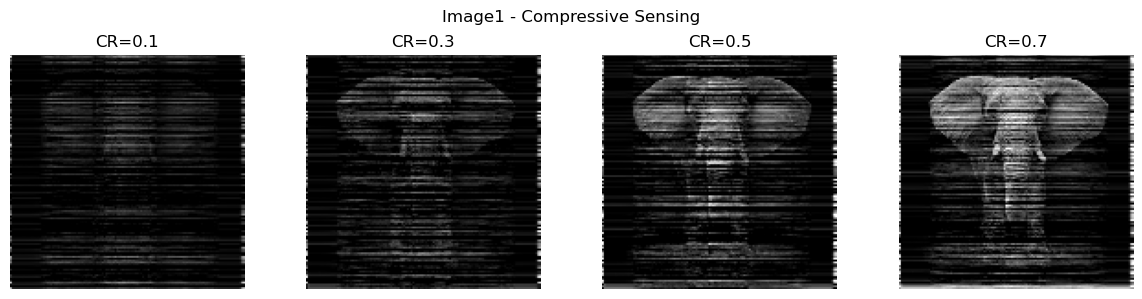

--- Image2 ---
Huffman Bits: 125867, Entropy: 7.6572
Shannon Bits: 133080, Entropy: 7.6572



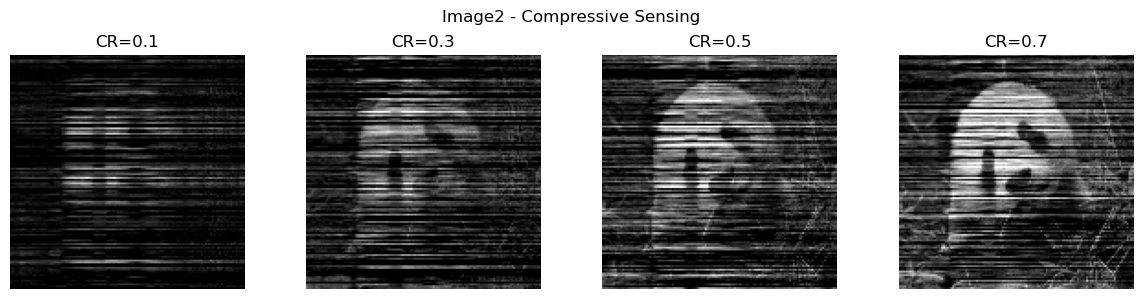

In [1]:
# Data Compression: Lossless vs. Lossy
# Perform Huffman, Shannon, and Compressive Sensing on two grayscale images

import numpy as np
import cv2
from collections import Counter
import heapq
import math
import matplotlib.pyplot as plt

# Load and preprocess images
def load_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (128, 128))

img1 = load_image("S:\Info_Theory\elephant.jpg")  # Replace with your image paths
img2 = load_image("S:\Info_Theory\panda.jpg")

# Entropy calculation
def entropy(img):
    hist = Counter(img.flatten())
    total = sum(hist.values())
    probs = [count / total for count in hist.values()]
    return -sum(p * np.log2(p) for p in probs if p > 0)

# Huffman coding
class HuffmanNode:
    def __init__(self, symbol, freq):
        self.symbol = symbol
        self.freq = freq
        self.left = None
        self.right = None
    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(frequencies):
    heap = [HuffmanNode(symbol, freq) for symbol, freq in frequencies.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = HuffmanNode(None, left.freq + right.freq)
        merged.left = left
        merged.right = right
        heapq.heappush(heap, merged)
    return heap[0]

def generate_codes(node, prefix="", codebook=None):
    if codebook is None:
        codebook = {}
    if node.symbol is not None:
        codebook[node.symbol] = prefix
    else:
        generate_codes(node.left, prefix + "0", codebook)
        generate_codes(node.right, prefix + "1", codebook)
    return codebook

def huffman_encoding(img):
    freqs = Counter(img.flatten())
    root = build_huffman_tree(freqs)
    codebook = generate_codes(root)
    encoded_bits = ''.join(codebook[pixel] for pixel in img.flatten())
    return len(encoded_bits), entropy(img)

# Shannon coding
def shannon_encoding(img):
    probs = Counter(img.flatten())
    total = sum(probs.values())
    probs = {k: v / total for k, v in sorted(probs.items(), key=lambda item: item[1], reverse=True)}
    bits_total = 0
    for symbol, p in probs.items():
        l = math.ceil(-math.log2(p))
        bits_total += l * (p * total)
    return int(bits_total), entropy(img)

# Compressive Sensing simulation
def compressive_sensing(img, compression_ratio):
    m, n = img.shape
    num_measurements = int(m * compression_ratio)
    phi = np.random.randn(num_measurements, m)
    y = phi @ img
    recovery = np.linalg.pinv(phi) @ y
    return np.clip(recovery, 0, 255)

# Run all on both images
for name, img in zip(["Image1", "Image2"], [img1, img2]):
    huff_bits, huff_entropy = huffman_encoding(img)
    shan_bits, shan_entropy = shannon_encoding(img)

    print(f"--- {name} ---")
    print(f"Huffman Bits: {huff_bits}, Entropy: {huff_entropy:.4f}")
    print(f"Shannon Bits: {shan_bits}, Entropy: {shan_entropy:.4f}\n")

    plt.figure(figsize=(12, 3))
    for idx, ratio in enumerate([0.1, 0.3, 0.5, 0.7]):
        recon = compressive_sensing(img, ratio)
        plt.subplot(1, 4, idx + 1)
        plt.imshow(recon, cmap='gray')
        plt.title(f'CR={ratio}')
        plt.axis('off')
    plt.suptitle(f'{name} - Compressive Sensing')
    plt.tight_layout()
    plt.show()
